## Mushroom Classification
A project aiming to classificate mushrooms based on recorded characteristics into poisonous or edible

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import lightgbm as lgb

# Data cleaning
from sklearn.preprocessing import LabelEncoder

N_FOLDS = 5
MAX_EVALS = 5

# Display plots in the notebook
%matplotlib inline

In [4]:
# Importing the data
data = pd.read_csv('C:/Users/liaba/Documents/mushroom_classification/mushroom_data/train.csv')
test_data = pd.read_csv('C:/Users/liaba/Documents/mushroom_classification/mushroom_data/test.csv')
data.set_index('id', inplace=True)
test_data.set_index('id', inplace=True)

<Axes: xlabel='class', ylabel='count'>

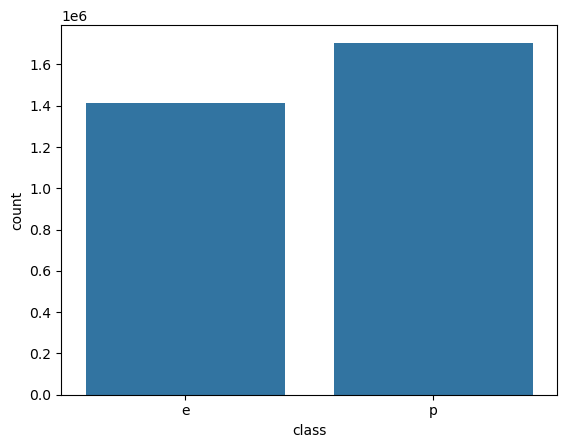

In [5]:
sns.countplot(x='class',data=data)

In [6]:
# Setting the data type of the columns
data['cap-diameter'] = pd.to_numeric(data['cap-diameter'])
data['stem-height'] = pd.to_numeric(data['stem-height'])
data['stem-width'] = pd.to_numeric(data['stem-width'])

In [7]:
# Define allowed values and encoding mappings
class_val = {'e', 'p'}
cap_val = {'b', 'c', 'x', 'f', 's', 'p', 'o'}
surf_val = {'i', 'g', 'y', 's', 'h', 'l', 'k', 't', 'w', 'e'}
color_val = {'n', 'b', 'g', 'r', 'p', 'u', 'e', 'w', 'y', 'l', 'o', 'k'}
bruise_val = {'t', 'f'}
gill_val = {'a', 'x', 'd', 'e', 's', 'p', 'f'}
spacing_val = {'c', 'd', 'f'}
gill_col_val = {'n', 'b', 'g', 'r', 'p', 'u', 'e', 'w', 'y', 'l', 'o', 'k', 'f'}
root_val = {'b', 's', 'c', 'u', 'e', 'z', 'r'}
veil_val = {'p', 'u'}
ring_val = {'t', 'f'}
ing_val = {'c', 'e', 'r', 'g', 'l', 'p', 's', 'z', 'y', 'm', 'f'}
habitat_val = {'g', 'l', 'm', 'p', 'h', 'u', 'w', 'd'}
season_val = {'s', 'u', 'a', 'w'}

class_enc = {'e': 1, 'p': 0}
cap_enc = {'b': 1, 'c': 2, 'x': 3, 'f': 4, 's': 5, 'p': 6, 'o': 7, '0': 0}
surf_enc = {'i': 1, 'g': 2, 'y': 3, 's': 4, 'h': 5, 'l': 6, 'k': 7, 't': 8, 'w': 9, 'e': 10, '0': 0}
color_enc = {'n': 1, 'b': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9, 'l': 10, 'o': 11, 'k': 12, '0': 0}
bruise_enc = {'t': 1, 'f': 0, '0':0}
gill_enc = {'a': 1, 'x': 2, 'd': 3, 'e': 4, 's': 5, 'p': 6, 'f': 7, '0': 0}
spacing_enc = {'c': 1, 'd': 2, 'f': 3, '0': 0}
gill_col_enc = {'n': 1, 'b': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9, 'l': 10, 'o': 11, 'k': 12, 'f':13, '0': 0}
root_enc = {'b': 1, 's': 2, 'c': 3, 'u': 4, 'e': 5, 'z': 6, 'r': 7, '0': 0}
veil_enc = {'p': 1, 'u': 2, '0': 0}
ring_enc = {'t': 1, 'f': 0, '0': 0}
ing_enc = {'c': 1, 'e': 2, 'r': 3, 'g': 4, 'l': 5, 'p': 6, 's': 7, 'z': 8, 'y': 9, 'm': 10, 'f': 11, '0': 0}
habitat_enc = {'g': 1, 'l': 2, 'm': 3, 'p': 4, 'h': 5, 'u': 6, 'w': 7, 'd': 8, '0': 0}
season_enc = {'s': 1, 'u': 2, 'a': 3, 'w': 4, '0': 0}

# Replace values not in the sets with '0'
data['cap-shape'] = data['cap-shape'].apply(lambda x: x if x in cap_val else '0')
data['cap-surface'] = data['cap-surface'].apply(lambda x: x if x in surf_val else '0')
data['cap-color'] = data['cap-color'].apply(lambda x: x if x in color_val else '0')
data['does-bruise-or-bleed'] = data['does-bruise-or-bleed'].apply(lambda x: x if x in bruise_val else '0')
data['gill-attachment'] = data['gill-attachment'].apply(lambda x: x if x in gill_val else '0')
data['gill-spacing'] = data['gill-spacing'].apply(lambda x: x if x in spacing_val else '0')
data['gill-color'] = data['gill-color'].apply(lambda x: x if x in gill_col_val else '0')
data['stem-root'] = data['stem-root'].apply(lambda x: x if x in root_val else '0')
data['stem-surface'] = data['stem-surface'].apply(lambda x: x if x in surf_val else '0')
data['stem-color'] = data['stem-color'].apply(lambda x: x if x in gill_col_val else '0')
data['veil-type'] = data['veil-type'].apply(lambda x: x if x in veil_val else '0')
data['veil-color'] = data['veil-color'].apply(lambda x: x if x in gill_col_val else '0')
data['has-ring'] = data['has-ring'].apply(lambda x: x if x in ring_val else '0')
data['ring-type'] = data['ring-type'].apply(lambda x: x if x in ing_val else '0')
data['spore-print-color'] = data ['spore-print-color'].apply(lambda x: x if x in color_val else '0')
data['habitat'] = data['habitat'].apply(lambda x: x if x in habitat_val else '0')
data['season'] = data['season'].apply(lambda x: x if x in season_val else '0')

# Apply the custom mapping
data['cap-shape_encoded'] = data['cap-shape'].map(cap_enc)
data['cap-surface_encoded'] = data['cap-surface'].map(surf_enc)
data['cap-color_encoded'] = data['cap-color'].map(color_enc)
data['does-bruise-or-bleed_encoded'] = data['does-bruise-or-bleed'].map(bruise_enc)
data['gill-attachment_encoded'] = data['gill-attachment'].map(gill_enc)
data['gill-spacing_encoded'] = data['gill-spacing'].map(spacing_enc)
data['gill-color_encoded'] = data['gill-color'].map(gill_col_enc)
data['stem-root_encoded'] = data['stem-root'].map(root_enc)
data['stem-surface_encoded'] = data['stem-surface'].map(surf_enc)
data['stem-color_encoded'] = data['stem-color'].map(gill_col_enc)
data['veil-type_encoded'] = data['veil-type'].map(veil_enc)
data['veil-color_encoded'] = data['veil-color'].map(gill_col_enc)
data['has-ring_encoded'] = data['has-ring'].map(ring_enc)
data['ring-type_encoded'] = data['ring-type'].map(ing_enc)
data['spore-print-color_encoded'] = data['spore-print-color'].map(color_enc)
data['habitat_encoded'] = data['habitat'].map(habitat_enc)
data['season_encoded'] = data['season'].map(season_enc)
data['class_encoded'] = data['class'].map(class_enc)

# Rename the columns directly to the original names
data['cap-shape'] = data['cap-shape_encoded'].copy()
data['cap-surface'] = data['cap-surface_encoded'].copy()
data['cap-color'] = data['cap-color_encoded'].copy()
data['does-bruise-or-bleed'] = data['does-bruise-or-bleed_encoded'].copy()
data['gill-attachment'] = data['gill-attachment_encoded'].copy()
data['gill-spacing'] = data['gill-spacing_encoded'].copy()
data['gill-color'] = data['gill-color_encoded'].copy()
data['stem-root'] = data['stem-root_encoded'].copy()
data['stem-surface'] = data['stem-surface_encoded'].copy()
data['stem-color'] = data['stem-color_encoded'].copy()
data['veil-type'] = data['veil-type_encoded'].copy()
data['has-ring'] = data['has-ring_encoded'].copy()
data['ring-type'] = data['ring-type_encoded'].copy()
data['spore-print-color'] = data['spore-print-color_encoded'].copy()
data['habitat'] = data['habitat_encoded'].copy()
data['season'] = data['season_encoded'].copy()
data['class'] = data['class_encoded'].copy()
data['veil-color'] = data['veil-color_encoded'].copy()

# Drop the temporary encoded columns
data = data.drop(['class_encoded','cap-shape_encoded','cap-surface_encoded','cap-color_encoded','does-bruise-or-bleed_encoded','gill-attachment_encoded','gill-spacing_encoded','gill-color_encoded','stem-root_encoded','stem-surface_encoded','stem-color_encoded','veil-type_encoded', 'veil-color_encoded','has-ring_encoded','ring-type_encoded','spore-print-color_encoded','habitat_encoded','season_encoded'], axis=1)


In [8]:
test_data['cap-shape'] = test_data['cap-shape'].apply(lambda x: x if x in cap_val else '0')
test_data['cap-surface'] = test_data['cap-surface'].apply(lambda x: x if x in surf_val else '0')
test_data['cap-color'] = test_data['cap-color'].apply(lambda x: x if x in color_val else '0')
test_data['does-bruise-or-bleed'] = test_data['does-bruise-or-bleed'].apply(lambda x: x if x in bruise_val else '0')
test_data['gill-attachment'] = test_data['gill-attachment'].apply(lambda x: x if x in gill_val else '0')
test_data['gill-spacing'] = test_data['gill-spacing'].apply(lambda x: x if x in spacing_val else '0')
test_data['gill-color'] = test_data['gill-color'].apply(lambda x: x if x in gill_col_val else '0')
test_data['stem-root'] = test_data['stem-root'].apply(lambda x: x if x in root_val else '0')
test_data['stem-surface'] = test_data['stem-surface'].apply(lambda x: x if x in surf_val else '0')
test_data['stem-color'] = test_data['stem-color'].apply(lambda x: x if x in gill_col_val else '0')
test_data['veil-type'] = test_data['veil-type'].apply(lambda x: x if x in veil_val else '0')
test_data['veil-color'] = test_data['veil-color'].apply(lambda x: x if x in gill_col_val else '0')
test_data['has-ring'] = test_data['has-ring'].apply(lambda x: x if x in ring_val else '0')
test_data['ring-type'] = test_data['ring-type'].apply(lambda x: x if x in ing_val else '0')
test_data['spore-print-color'] = test_data['spore-print-color'].apply(lambda x: x if x in color_val else '0')
test_data['habitat'] = test_data['habitat'].apply(lambda x: x if x in habitat_val else '0')
test_data['season'] = test_data['season'].apply(lambda x: x if x in season_val else '0')

test_data['cap-shape_encoded'] = test_data['cap-shape'].map(cap_enc)
test_data['cap-surface_encoded'] = test_data['cap-surface'].map(surf_enc)
test_data['cap-color_encoded'] = test_data['cap-color'].map(color_enc)
test_data['does-bruise-or-bleed_encoded'] = test_data['does-bruise-or-bleed'].map(bruise_enc)
test_data['gill-attachment_encoded'] = test_data['gill-attachment'].map(gill_enc)
test_data['gill-spacing_encoded'] = test_data['gill-spacing'].map(spacing_enc)
test_data['gill-color_encoded'] = test_data['gill-color'].map(gill_col_enc)
test_data['stem-root_encoded'] = test_data['stem-root'].map(root_enc)
test_data['stem-surface_encoded'] = test_data['stem-surface'].map(surf_enc)
test_data['stem-color_encoded'] = test_data['stem-color'].map(gill_col_enc)
test_data['veil-type_encoded'] = test_data['veil-type'].map(veil_enc)
test_data['veil-color_encoded'] = test_data['veil-color'].map(gill_col_enc)
test_data['has-ring_encoded'] = test_data['has-ring'].map(ring_enc)
test_data['ring-type_encoded'] = test_data['ring-type'].map(ing_enc)
test_data['spore-print-color_encoded'] = test_data['spore-print-color'].map(color_enc)
test_data['habitat_encoded'] = test_data['habitat'].map(habitat_enc)
test_data['season_encoded'] = test_data['season'].map(season_enc)

test_data['cap-shape'] = test_data['cap-shape_encoded'].copy()
test_data['cap-surface'] = test_data['cap-surface_encoded'].copy()
test_data['cap-color'] = test_data['cap-color_encoded'].copy()
test_data['does-bruise-or-bleed'] = test_data['does-bruise-or-bleed_encoded'].copy()
test_data['gill-attachment'] = test_data['gill-attachment_encoded'].copy()
test_data['gill-spacing'] = test_data['gill-spacing_encoded'].copy()
test_data['gill-color'] = test_data['gill-color_encoded'].copy()
test_data['stem-root'] = test_data['stem-root_encoded'].copy()
test_data['stem-surface'] = test_data['stem-surface_encoded'].copy()
test_data['stem-color'] = test_data['stem-color_encoded'].copy()
test_data['veil-type'] = test_data['veil-type_encoded'].copy()
test_data['has-ring'] = test_data['has-ring_encoded'].copy()
test_data['ring-type'] = test_data['ring-type_encoded'].copy()
test_data['spore-print-color'] = test_data['spore-print-color_encoded'].copy()
test_data['habitat'] = test_data['habitat_encoded'].copy()
test_data['season'] = test_data['season_encoded'].copy()
test_data['veil-color'] = test_data['veil-color_encoded'].copy()

# Drop the temporary encoded columns
test_data = test_data.drop(['cap-shape_encoded','cap-surface_encoded','cap-color_encoded','does-bruise-or-bleed_encoded','gill-attachment_encoded','gill-spacing_encoded','gill-color_encoded','stem-root_encoded','stem-surface_encoded','stem-color_encoded','veil-type_encoded', 'veil-color_encoded','has-ring_encoded','ring-type_encoded','spore-print-color_encoded','habitat_encoded','season_encoded'], axis=1)

In [9]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = data.drop(columns=['class'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [11]:
train_set = lgb.Dataset(data = X_train, label = y_train)
test_set = lgb.Dataset(data = X_test, label = y_test)

In [ ]:
# Get default hyperparameters
model = lgb.LGBMClassifier()
default_params = model.get_params()

# Remove the number of estimators because we set this to 10000 in the cv call
del default_params['n_estimators']

# Cross validation with early stopping
cv_results = lgb.cv(default_params, train_set, num_boost_round = 10000,  callbacks=[lgb.early_stopping(stopping_rounds=100)], metrics = 'auc', nfold = N_FOLDS, seed = 42)

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.138487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 1670682, number of used features: 20
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

In [ ]:
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
submission = clf.predict(test_data)

In [ ]:
submission_df = pd.DataFrame(data=submission, index=test_data.index, columns=['class'])
submission_df['class'] = submission_df['class'].replace({1: 'e', 0: 'p'})
submission_df.head()

In [ ]:
# Export the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=True)